## BC cone contact statistics for Figure S2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from helpers import sns_styleset
%matplotlib inline

In [2]:
sns_styleset()

In [3]:
# Load BC IDs and types
BC_ids=np.loadtxt('./data/BC_IDs_new').astype(int)
# Set IDs of missclassified BCs to exclude
BC_excluded=np.array([691,709,827,836])

In [4]:
# Load contact summary data from Behrens et al. 2016 and keep only contacts classified as synapse
contact_summary=pd.read_csv('./data/cone_contact_predictions.csv', index_col=0)
true_contacts=contact_summary.loc[(contact_summary['prediction']==1)]
# Get all cone IDs
cone_ids=np.unique(contact_summary['cone'].values)

In [5]:
stat_bc_contacts_on=pd.DataFrame(BC_ids[(BC_ids[:,4]>=63)&(BC_ids[:,4]<=70)&np.in1d(BC_ids[:,0],BC_excluded,invert=True)][:,[0,4]],columns=['cell','type'])
all_contact_freq_type=np.array(np.unique(true_contacts['cell'].values,return_counts=True)).T
for i in range(stat_bc_contacts_on.shape[0]):
    stat_bc_contacts_on.loc[i,'count']=0
    try:
        stat_bc_contacts_on.loc[i,'count']=all_contact_freq_type[all_contact_freq_type[:,0]==stat_bc_contacts_on.loc[i,'cell'],1]
    except ValueError:
        continue
for i in range(stat_bc_contacts_on.shape[0]):
    stat_bc_contacts_on.loc[i,'count_rounded']=np.clip((stat_bc_contacts_on.loc[i,'count']+1)//2,0,4)

In [6]:
stat_cone_contacts_on=pd.DataFrame(np.concatenate((np.tile(cone_ids,8).reshape(-1,1),np.repeat(np.arange(63,71),cone_ids.shape[0]).reshape(-1,1)),axis=1),columns=['cone','type'])
for i in range(stat_cone_contacts_on.shape[0]):
    stat_cone_contacts_on.loc[i,'count']=np.sum((true_contacts['cone']==stat_cone_contacts_on.loc[i,'cone'])&\
                                                   (true_contacts['type']==stat_cone_contacts_on.loc[i,'type']))

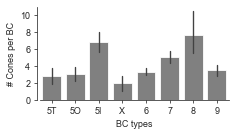

In [7]:
labels = ['5T','5O','5I','X','6','7','8','9']
plt.figure(figsize=(8.5/2.54,5/2.54),tight_layout=True)
ax=sns.barplot(x='type',y='count',data=stat_bc_contacts_on,order=np.arange(63,71),ci=95,color='grey')
ax.set_xticklabels(labels)
ax.set(ylabel='# Cones per BC',ylim=(0,11),xlabel='BC types',yticks=[0,2,4,6,8,10])
ax.spines['left'].set_position(('outward',3))
sns.despine()
# plt.savefig('./figures/FigS2A_On_BC_cone_contacts_per_BC.svg',dpi=300)
plt.show()

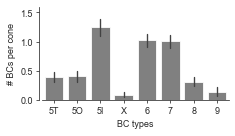

In [8]:
labels = ['5T','5O','5I','X','6','7','8','9']
plt.figure(figsize=(8.5/2.54,5/2.54),tight_layout=True)
ax=sns.barplot(x='type',y='count',data=stat_cone_contacts_on,order=np.arange(63,71),ci=95,color='grey')
ax.set_xticklabels(labels)
ax.set(ylabel='# BCs per cone',xlabel='BC types',ylim=(0,1.6),yticks=[0,0.5,1,1.5])
ax.spines['left'].set_position(('outward',3))
sns.despine()
# plt.savefig('./figures/FigS2B_On_BC_cone_contacts_per_cone.svg',dpi=300)
plt.show()